In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import yfinance as yf

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.widgets import Button, Slider
from ipywidgets import interact, FloatSlider

La presente serie resulta de mi interés porque Netflix es actualmente una de las plataformas de streaming digital con mayor demanda en el mercado. Su constante innovación en la producción de series y películas le ha permitido mantener un crecimiento sostenido en el precio de sus acciones durante los últimos años. Asimismo, la serie temporal de Netflix muestra fluctuaciones constantes; sin embargo, recientemente evidencia una tendencia alcista. A pesar del incremento de la competencia derivado de la expansión de la digitalización en el sector, la empresa ha demostrado una notable estabilidad, suficiente para seguir generando mayores rendimientos en el precio de cierre de sus acciones.
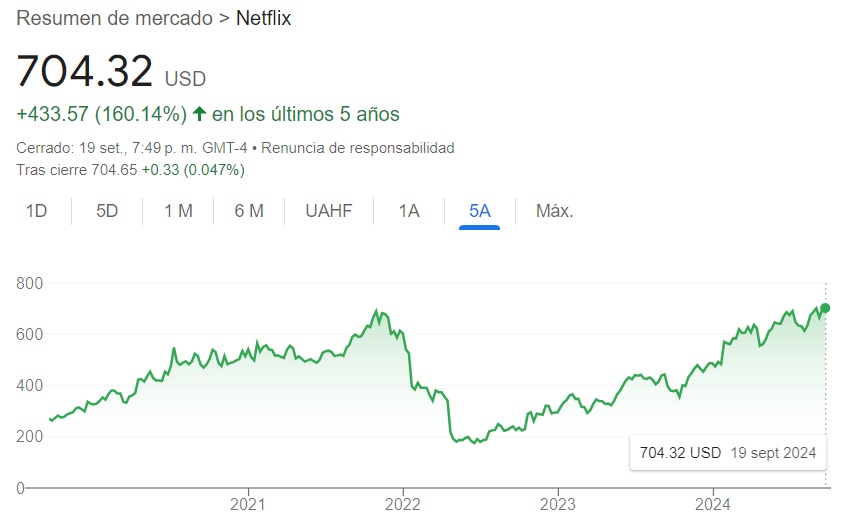

In [9]:
df_Netflix =  yf.download("NFLX", start="2023-01-01", end="2024-06-24")

[*********************100%***********************]  1 of 1 completed


In [13]:
print(len(df_Netflix))
df_Netflix["date"] = pd.date_range(start="2023-01-01", periods=len(df_Netflix), freq="D")
df_Netflix = df_Netflix.set_index("date")
df_Netflix.head()

368


,Open,High,Low,Close,Adj Close,Volume,r_Close
date,,,,,,,
2023-01-01,298.239990,311.140015,295.510010,309.410004,309.410004,9345100,4.902523
2023-01-02,307.000000,314.179993,304.549988,309.700012,309.700012,8328400,0.093730
2023-01-03,311.570007,316.769989,303.690002,315.549988,315.549988,8959800,1.888917
2023-01-04,316.829987,321.700012,313.220001,315.170013,315.170013,6766600,-0.120417
2023-01-05,311.070007,329.350006,311.070007,327.540009,327.540009,13072300,3.924864


<function matplotlib.pyplot.show(close=None, block=None)>

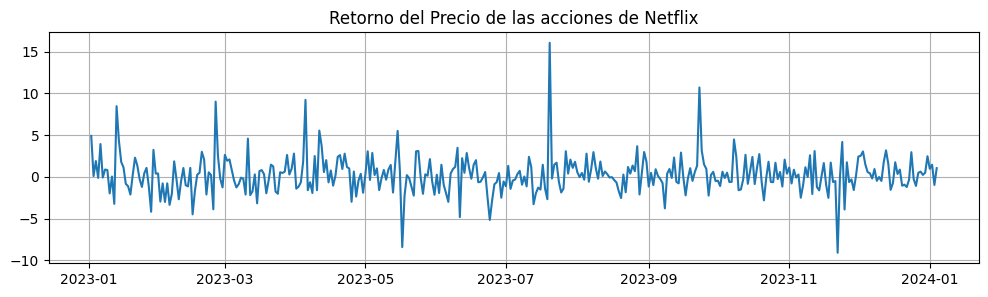

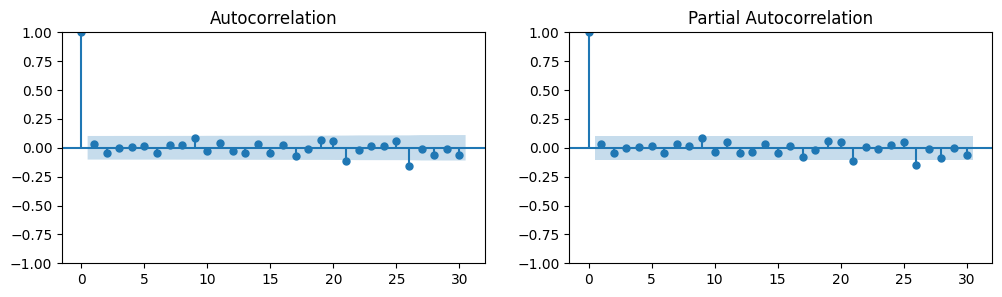

In [11]:
df_Netflix["r_Close"]  = df_Netflix["Close"].pct_change(periods = 1)*100
df_Netflix = df_Netflix.dropna()

fig, axs = plt.subplots(figsize=(12, 3))
axs.plot(df_Netflix["r_Close"])
axs.grid(which = 'major')
axs.set_title("Retorno del Precio de las acciones de Netflix")

fig, ax = plt.subplots(1,2, figsize=(12,3))
plot_acf(df_Netflix["r_Close"], lags = 30, ax = ax[0])
plot_pacf(df_Netflix["r_Close"], lags = 30, ax = ax[1])
plt.show

La presente serie se ajusta a un modelo ARMA(0,0), dado que no se observa un patrón de disminución gradual en la función de autocorrelación (ACF) que indique la presencia de un componente autorregresivo (AR). Del mismo modo, tampoco se aprecia un descenso abrupto en la ACF que sugiera un componente de media móvil (MA). En cuanto a la función de autocorrelación parcial (PACF), se evidencia que, de existir un componente AR, este correspondería a un AR(0); y, de existir un componente MA, el ACF reflejaría un MA(0). Tras realizar el análisis de significancia respectivo, se concluye que el comportamiento de la serie se explica adecuadamente mediante un modelo ARMA(0,0).

In [23]:
ar_max = 4
ma_max = 2

train = '2024-01-30'
n_steps = 50  # En lugar de calcularlo automáticamente


bic_results = pd.DataFrame(columns = range(0, ma_max + 1),
                           index = range(0, ar_max + 1))

for i in range(0, ar_max + 1):
    for j in range(0, ma_max + 1):
        cooper_mod = SARIMAX(df_Netflix[:train]["r_Close"],
                             order = (i, 0, j), #p, d, q
                             trend = 'c')
        results = cooper_mod.fit()
        bic_results.iloc[i][j] = results.aic

aic_results = bic_results.apply(pd.to_numeric, errors = 'coerce', axis=0)
aic_results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

,0,1,2
0,1639.601614,1641.165157,1642.183117
1,1641.210641,1641.728062,1644.181578
2,1642.185804,1644.185643,1646.186021
3,1644.185641,1646.185655,1648.165428
4,1646.185015,1648.184727,1647.913411


In [24]:
bic_results.stack().idxmin()

(0, 0)

In [30]:
aic_results.stack().idxmin()

(0, 0)

In [25]:
cooper_mod = SARIMAX(df_Netflix[:train]["r_Close"], order = (0, 0, 0), trend = 'c')
results    = cooper_mod.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                r_Close   No. Observations:                  367
Model:                        SARIMAX   Log Likelihood                -817.801
Date:                Fri, 20 Sep 2024   AIC                           1639.602
Time:                        01:21:40   BIC                           1647.412
Sample:                    01-02-2023   HQIC                          1642.705
                         - 01-03-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2420      0.127      1.907      0.057      -0.007       0.491
sigma2         5.0470      0.169     29.847      0.000       4.716       5.378
Ljung-Box (L1) (Q):                   0.39   Jarque-

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [29]:
cooper_mod = SARIMAX(df_Netflix[:train]["r_Close"], order = (2, 0, 2), trend = 'c')
results    = cooper_mod.fit()
print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                r_Close   No. Observations:                  367
Model:               SARIMAX(2, 0, 2)   Log Likelihood                -817.093
Date:                Fri, 20 Sep 2024   AIC                           1646.186
Time:                        01:22:38   BIC                           1669.618
Sample:                    01-02-2023   HQIC                          1655.496
                         - 01-03-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2503      0.591      0.423      0.672      -0.909       1.410
ar.L1          0.0493      1.426      0.035      0.972      -2.745       2.843
ar.L2         -0.0840      1.108     -0.076      0.9

In [31]:
cooper_mod = SARIMAX(df_Netflix[:train]["r_Close"], order = (1, 0, 0), trend = 'c')
results    = cooper_mod.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                r_Close   No. Observations:                  367
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -817.605
Date:                Fri, 20 Sep 2024   AIC                           1641.211
Time:                        01:23:26   BIC                           1652.927
Sample:                    01-02-2023   HQIC                          1645.866
                         - 01-03-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2343      0.127      1.843      0.065      -0.015       0.483
ar.L1          0.0326      0.051      0.639      0.523      -0.067       0.133
sigma2         5.0416      0.178     28.350      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Como se puede evidenciar en el presente modelo, al realizar la prueba de significancia y tabular los diferentes valores para obtener una estimación más precisa, se concluye que el modelo ARMA(0,0) ofrece el mejor ajuste para la serie temporal del retorno de los precios de cierre de Netflix. Esto se debe a que presenta los valores más bajos de los criterios de información AIC y BIC, en comparación con los demás modelos evaluados, lo que indica una mayor eficiencia en la estimación y un mejor equilibrio entre ajuste y complejidad del modelo.

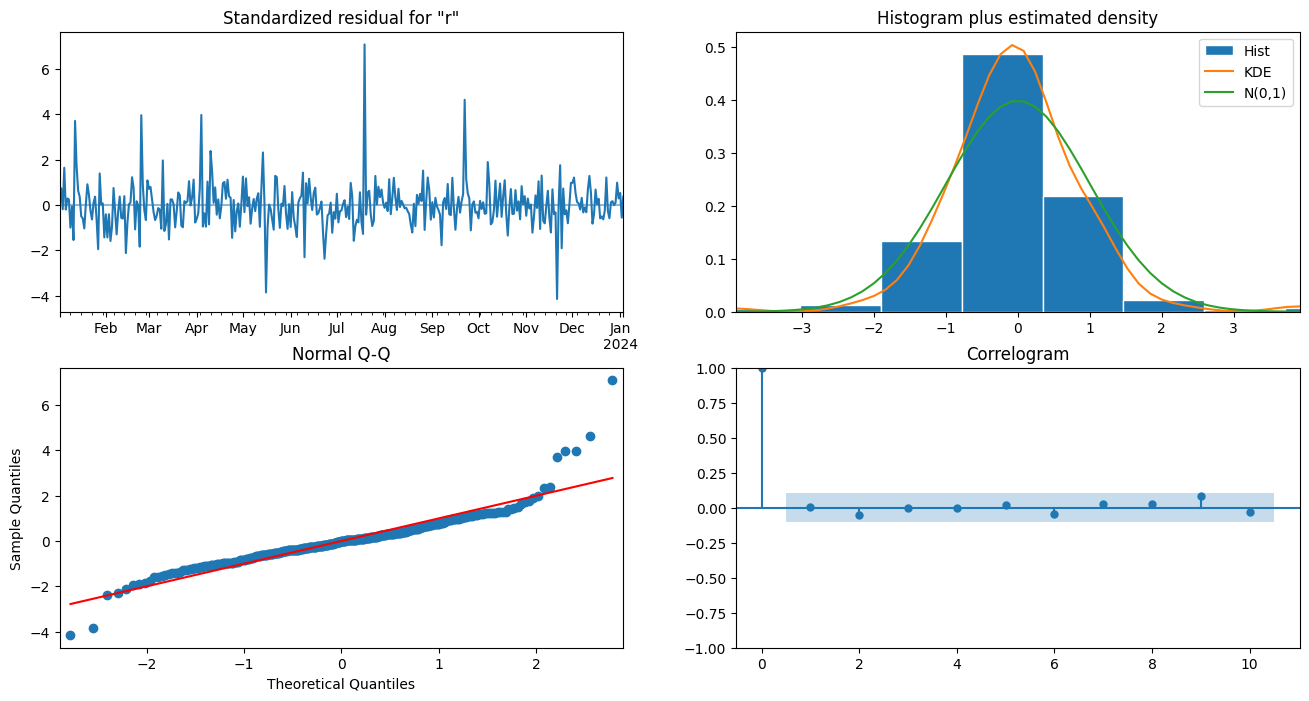

In [32]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

En cuanto al análisis de los residuos estandarizados, se observa que estos fluctúan alrededor del valor cero, lo cual es un comportamiento deseable. No obstante, se identifican algunos eventos atípicos —como en el mes de agosto— que podrían corresponder a fenómenos excepcionales. En general, el modelo logra capturar adecuadamente las características de los errores de la serie, sin evidenciar la presencia de tendencia sistemática.

Respecto al histograma de los residuos, puede apreciarse que la distribución sigue de manera bastante cercana una distribución normal con media 0 y varianza 1. Sin embargo, las colas en los extremos no se ajustan completamente a dicha distribución, lo que indica que los residuos no se acoplan de forma perfecta a la normalidad, aunque su comportamiento general es aceptable.

De forma similar, en el gráfico Q–Q, los puntos se alinean bien con la línea de referencia (línea roja), salvo en los valores extremos, donde se observa una ligera desviación. Esto refuerza la idea de que, si bien los residuos se aproximan a una distribución normal con media 0 y varianza 1, el ajuste no es exacto en los extremos.

En el correlograma de los residuos, se aprecia que ninguna de las autocorrelaciones parciales o simples excede el intervalo de confianza, lo cual es un resultado favorable, ya que sugiere que los residuos son independientes entre sí.

En conjunto, el análisis permite concluir que los errores del modelo son estacionarios e independientes, por lo que el ARMA(0,0) constituye una representación estadísticamente adecuada de la dinámica de la serie temporal analizada.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

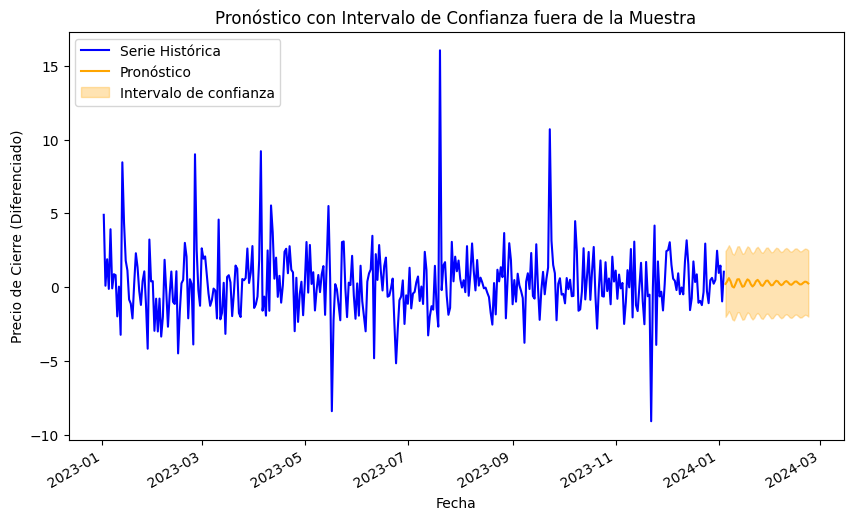

In [12]:
ar_max = 4
ma_max = 2

train = '2024-01-30'
n_steps = 50


bic_results = pd.DataFrame(columns = range(0, ma_max + 1),
                           index = range(0, ar_max + 1))

for i in range(0, ar_max + 1):
    for j in range(0, ma_max + 1):
        cooper_mod = SARIMAX(df_Netflix[:train]["r_Close"],
                             order = (i, 0, j),
                             trend = 'c')
        results = cooper_mod.fit()
        bic_results.iloc[i][j] = results.aic

aic_results = bic_results.apply(pd.to_numeric, errors = 'coerce', axis=0)
aic_results
forecast = results.get_forecast(steps=n_steps)
ci = forecast.conf_int(alpha=0.32)
observed = df_Netflix[:train]["r_Close"]
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_Netflix.index, df_Netflix["r_Close"], label="Serie Histórica", color='blue')
forecast.predicted_mean.plot(ax=ax, label="Pronóstico", color='orange')
ax.fill_between(ci.index, ci.iloc[:, 0], ci.iloc[:, 1], color='orange', alpha=0.3, label="Intervalo de confianza")
ax.set_xlabel('Fecha')
ax.set_ylabel('Precio de Cierre (Diferenciado)')
ax.set_title('Pronóstico con Intervalo de Confianza fuera de la Muestra')
ax.legend(loc='upper left')

plt.show()

Como se puede apreciar, el presente modelo ofrece predicciones con un horizonte de hasta dos meses, y su comportamiento no sigue una tendencia constante, sino fluctuante, reflejando la naturaleza variable de la serie temporal. Este patrón sugiere que el modelo logra capturar adecuadamente los componentes estacionales y la volatilidad inherente al retorno de las acciones de Netflix. En consecuencia, el modelo ARMA(0,0) puede considerarse una herramienta apropiada para realizar pronósticos de corto plazo, especialmente en contextos de análisis financiero o de toma de decisiones de inversión sobre el comportamiento de dichas acciones.